In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
movie_ids_titles=pd.read_csv("movies.csv")

movie_ids_titles.head()

,movieId,title,genres
0,1,Movie_1,Comedy
1,2,Movie_2,Action|Romance
2,3,Movie_3,Romance
3,4,Movie_4,Comedy
4,5,Movie_5,Comedy|Drama


In [6]:
movie_ids_titles.shape

(200, 3)

In [7]:
movie_ids_ratings=pd.read_csv("ratings.csv")

movie_ids_ratings.head()

,userId,movieId,genre,rating
0,1,1,Action,4
1,1,1,Drama,3
2,1,1,Romance,2
3,1,1,Comedy,5
4,1,2,Action,2


In [8]:
movie_ids_ratings.shape

(80000, 4)

In [9]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)

movie_ids_titles.head()

,movieId,title
0,1,Movie_1
1,2,Movie_2
2,3,Movie_3
3,4,Movie_4
4,5,Movie_5


In [10]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')

merged_movie_df.head()

,userId,movieId,genre,rating,title
0,1,1,Action,4,Movie_1
1,1,1,Drama,3,Movie_1
2,1,1,Romance,2,Movie_1
3,1,1,Comedy,5,Movie_1
4,1,2,Action,2,Movie_2


In [11]:
# List of genres we're interested in
genres = ['Action', 'Comedy', 'Drama', 'Romance']

In [12]:
# Dictionary to store DataFrames for each genre
genre_dataframes = {}

for genre in genres:
    # Filter the merged_movie_df for the current genre
    genre_df = merged_movie_df[merged_movie_df['genre'] == genre]
    
    # Sort by rating in descending order
    genre_df = genre_df.sort_values('rating', ascending=False)
    
    # Store the DataFrame in our dictionary
    genre_dataframes[genre] = genre_df

# Now you can access each genre's DataFrame like this:
print("Top 5 Action Movies:")
print(genre_dataframes['Action'].head())

print("\nTop 5 Romance Movies:")
print(genre_dataframes['Romance'].head())

Top 5 Action Movies:
       userId  movieId   genre  rating      title
16          1        5  Action       5    Movie_5
79932     100      184  Action       5  Movie_184
79928     100      183  Action       5  Movie_183
79924     100      182  Action       5  Movie_182
20          1        6  Action       5    Movie_6

Top 5 Romance Movies:
       userId  movieId    genre  rating     title
8134       11       34  Romance       5  Movie_34
118         1       30  Romance       5  Movie_30
102         1       26  Romance       5  Movie_26
61942      78       86  Romance       5  Movie_86
74          1       19  Romance       5  Movie_19


In [13]:
for genre in genres:
    genre_dataframes[genre].groupby('title').describe()

# genre_dataframes['Action'].groupby('title').describe()

In [14]:
movie_rating_mean_count = {}

for genre in genres:
    # Create a DataFrame with mean and count of ratings for each movie in the genre
    movie_rating_mean_count[genre] = genre_dataframes[genre].groupby('title')['rating'].agg(['mean', 'count'])
    
    # Rename columns for clarity
    movie_rating_mean_count[genre].columns = ['rating_mean', 'rating_count']
    
    # Sort by mean rating in descending order
    movie_rating_mean_count[genre] = movie_rating_mean_count[genre].sort_values('rating_mean', ascending=False)

# Now you can access the data for each genre like this:
for genre in genres:
    print(f"\nTop 5 {genre} movies by average rating:")
    print(movie_rating_mean_count[genre].head())




Top 5 Action movies by average rating:
           rating_mean  rating_count
title                               
Movie_193         3.45           100
Movie_49          3.32           100
Movie_156         3.30           100
Movie_91          3.30           100
Movie_196         3.27           100

Top 5 Comedy movies by average rating:
           rating_mean  rating_count
title                               
Movie_192         3.41           100
Movie_157         3.33           100
Movie_184         3.30           100
Movie_120         3.30           100
Movie_109         3.29           100

Top 5 Drama movies by average rating:
           rating_mean  rating_count
title                               
Movie_197         3.43           100
Movie_58          3.42           100
Movie_74          3.38           100
Movie_28          3.36           100
Movie_136         3.30           100

Top 5 Romance movies by average rating:
           rating_mean  rating_count
title                     

In [15]:
user_movie_rating_matrix = {}

for genre in genres:
    user_movie_rating_matrix[genre] = genre_dataframes[genre].pivot_table(index="userId",columns="title",values="rating")

user_movie_rating_matrix['Action'].head()


title,Movie_1,Movie_10,Movie_100,Movie_101,Movie_102,Movie_103,Movie_104,Movie_105,Movie_106,Movie_107,...,Movie_90,Movie_91,Movie_92,Movie_93,Movie_94,Movie_95,Movie_96,Movie_97,Movie_98,Movie_99
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,2.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,4.0,...,4.0,5.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,3.0
2,2.0,1.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,...,3.0,4.0,3.0,4.0,2.0,5.0,1.0,2.0,2.0,4.0
3,4.0,2.0,5.0,4.0,3.0,3.0,1.0,1.0,3.0,1.0,...,4.0,3.0,5.0,5.0,3.0,5.0,4.0,2.0,4.0,3.0
4,4.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,1.0,2.0,...,5.0,3.0,5.0,1.0,2.0,5.0,5.0,4.0,3.0,5.0
5,1.0,4.0,1.0,2.0,1.0,4.0,5.0,5.0,4.0,5.0,...,4.0,4.0,5.0,1.0,5.0,1.0,3.0,2.0,1.0,3.0


In [17]:
all_movie_correlations = {}

for genre in genres:
    all_movie_correlations[genre] = user_movie_rating_matrix[genre].corr(method="pearson",min_periods=50)

all_movie_correlations['Action'].head()

title,Movie_1,Movie_10,Movie_100,Movie_101,Movie_102,Movie_103,Movie_104,Movie_105,Movie_106,Movie_107,...,Movie_90,Movie_91,Movie_92,Movie_93,Movie_94,Movie_95,Movie_96,Movie_97,Movie_98,Movie_99
title,,,,,,,,,,,,,,,,,,,,,
Movie_1,1.000000,-0.044732,0.114837,0.102090,-0.022237,-0.058395,0.134398,0.033418,0.075453,-0.120817,...,-0.132889,-0.101711,0.003207,0.079170,0.010941,-0.071007,-0.033337,0.070780,0.040177,-0.056758
Movie_10,-0.044732,1.000000,-0.230991,-0.052043,-0.169086,-0.222899,-0.009184,0.211657,-0.089480,0.256563,...,0.020278,-0.026598,-0.031818,-0.073394,-0.124795,0.078905,0.187147,-0.078794,0.054267,-0.035610
Movie_100,0.114837,-0.230991,1.000000,0.172457,-0.042211,-0.041675,0.059677,-0.183750,-0.030064,-0.229563,...,-0.080894,0.044998,-0.121918,0.075025,0.136039,0.073828,-0.044592,-0.076240,0.091564,-0.014472
Movie_101,0.102090,-0.052043,0.172457,1.000000,-0.184658,-0.055118,-0.163604,0.071688,-0.097810,-0.087570,...,0.038784,-0.033200,0.052278,-0.050488,-0.090311,0.186515,0.060376,-0.117632,-0.037556,0.067429
Movie_102,-0.022237,-0.169086,-0.042211,-0.184658,1.000000,0.254561,0.048764,-0.162907,0.041123,0.066854,...,-0.021327,-0.019916,0.003709,0.035152,-0.060166,0.084801,-0.024097,0.088579,0.053803,-0.116409


In [18]:
test1 = all_movie_correlations['Action']["Movie_1"].dropna(inplace=False)
test1.sort_values(ascending=False).head()

title
Movie_1      1.000000
Movie_154    0.220307
Movie_81     0.209745
Movie_35     0.203424
Movie_4      0.201348
Name: Movie_1, dtype: float64

In [42]:
movie_data=[['Movie_169',5.0]]

test_movies=pd.DataFrame(movie_data,columns=['Movie_Name','Movie_Rating'])

test_movies.head()

,Movie_Name,Movie_Rating
0,Movie_169,5.0


In [43]:
def get_movie_correlations(movie_name, genre):
    """
    Retrieve the movie correlation data for a specific genre.
    """
    try:
        if movie_name in all_movie_correlations[genre].columns:
            # Extract and return the relevant movie correlation data, dropping NaNs
            return all_movie_correlations[genre][movie_name].dropna()
        else:
            print(f"Movie '{movie_name}' not found in the correlation matrix for genre '{genre}'.")
            return pd.Series()
    except KeyError as e:
        print(f"KeyError: {e} while processing movie '{movie_name}' for genre '{genre}'.")
        return pd.Series()
    except Exception as e:
        print(f"Error processing movie '{movie_name}' for genre '{genre}': {str(e)}")
        return pd.Series()


In [44]:
def calculate_weighted_correlations(movie_name, movie_rating):
    """
    Calculate the weighted correlations for a movie across all genres.
    """
    weighted_correlations_sum = pd.Series()

    # Iterate over each genre
    for genre in genres:
        movie_correlations = get_movie_correlations(movie_name, genre)
        
        # Multiply the correlations by the movie rating and accumulate the results
        weighted_correlations_sum = weighted_correlations_sum.add(movie_correlations * movie_rating, fill_value=0)
    
    return weighted_correlations_sum

In [45]:
def generate_recommendations():
    """
    Generate movie recommendations based on the user's ratings of test movies.
    """
    final_recommendation_scores = pd.Series()

    # Iterate over each test movie the user has rated
    for i in range(len(test_movies)):
        movie_name = test_movies['Movie_Name'][i]
        movie_rating = test_movies['Movie_Rating'][i]
        
        # Calculate the weighted correlations for this movie and add to the final scores
        weighted_correlations_sum = calculate_weighted_correlations(movie_name, movie_rating)
        final_recommendation_scores = final_recommendation_scores.add(weighted_correlations_sum, fill_value=0)
    
    # Sort and return the top recommendations
    return final_recommendation_scores.sort_values(ascending=False)

In [46]:
def display_top_recommendations(final_recommendation_scores, top_n=10):
    """
    Display the top N movie recommendations.
    """
    print("Top recommendations:")
    print(final_recommendation_scores.head(top_n))

In [47]:
# Main script to generate and display recommendations
final_recommendation_scores = generate_recommendations()
display_top_recommendations(final_recommendation_scores)

Top recommendations:
title
Movie_169        20.0
Movie_177    3.466431
Movie_110    2.738211
Movie_44     2.707796
Movie_29      2.41097
Movie_17     2.261025
Movie_94     2.071837
Movie_10     1.839601
Movie_90     1.801095
Movie_81     1.760148
dtype: object


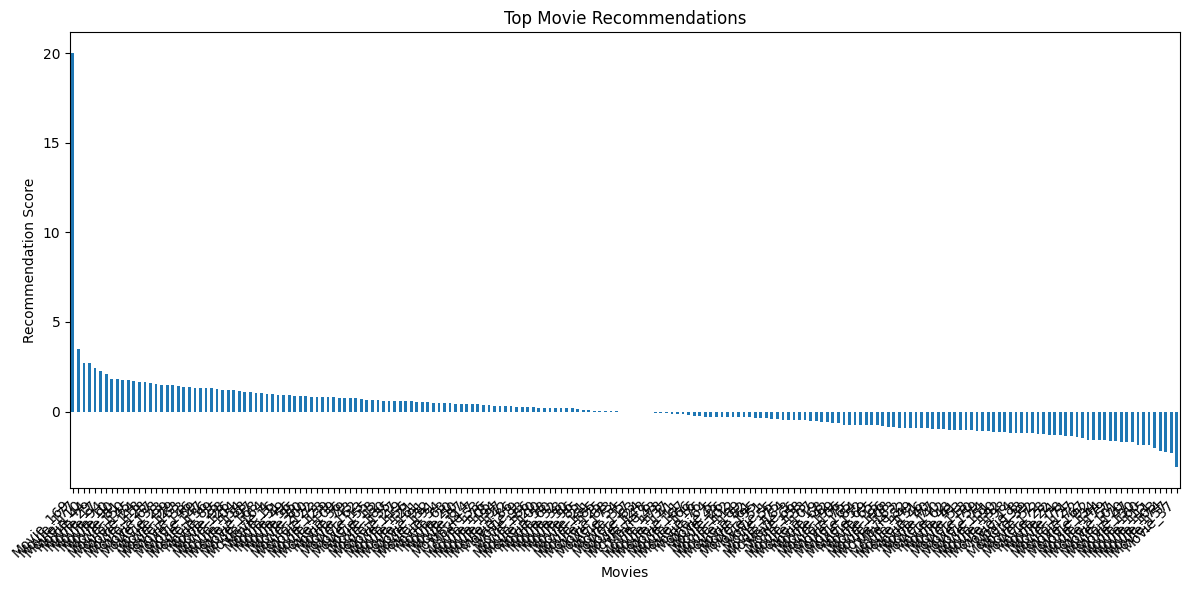

In [48]:
# Visualize the recommendations
plt.figure(figsize=(12, 6))
final_recommendation_scores.plot(kind='bar')
plt.title('Top Movie Recommendations')
plt.xlabel('Movies')
plt.ylabel('Recommendation Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()